## **CNN with MNIST Data**

In [56]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [57]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [58]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [59]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [60]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [61]:
X_train[5].shape

(28, 28)

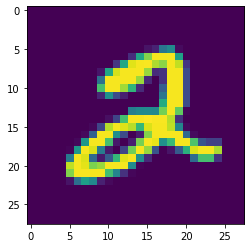

In [62]:
#It is white and black originally. 
#However, due to matplotlib's default setting, it seems colorful.
plt.imshow(X_train[5]);
# plt.matshow(X_train[5]);

In [63]:
# plt.imshow(X_train[5], cmap=plt.get_cmap('gray'));

In [64]:
y_train[7]

3

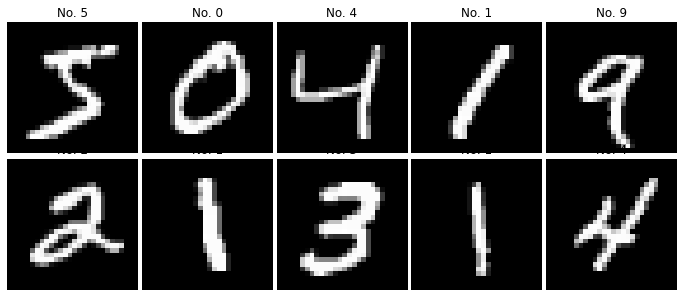

In [65]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [66]:
X_train[5].min()

0

In [67]:
X_train[5].max()

255

In [49]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [14]:
X_train[5].min()

0.0

In [15]:
X_train[5].max()

1.0

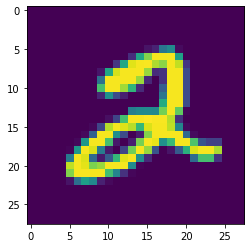

In [16]:
plt.imshow(X_train[5]);

In [68]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [69]:
#X_train.shape[0],28, 28, 1 deneme yaptık.

(60000, 28, 28, 1)

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
from tensorflow.keras.utils import to_categorical  # cat çevirelim  10 class var 0-9

In [21]:
Y_train = to_categorical(y_train, 10) # 10 verilmeli dummyden dolayı
Y_test = to_categorical(y_test, 10)
Y_test.shape  # 10000 satır 10 satır oldu dummyden dolayı

(10000, 10)

In [22]:
Y_train.shape

(60000, 10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

#kernel_size = filter_size
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
# modeli add ile ekledik

#Stride for pooling is2 and for convolsion 1
model.add(MaxPool2D(pool_size=(2, 2)))

#Flatten converts mour matrices into vector
model.add(Flatten())
# modele girmeye hazır

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))  # output katmanı binary sigmoid ama burda softmax

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)  # epoch 10 olunca patience 2 yaptık.
# erken durdur                val_los u görünüle sabır sayısı 2 olsun

In [28]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])
#  validation_data=(X_test,Y_test) test datasının tamamı verildi, calbackearly olunca yazdık

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1451 - accuracy: 0.9579 - val_loss: 0.0576 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0395 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0436 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0379 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0444 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0544 - val_accuracy: 0.9862


In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
model.history.history

{'loss': [0.14509956538677216,
  0.05010966956615448,
  0.03066522628068924,
  0.02059517800807953,
  0.013853797689080238,
  0.010454275645315647],
 'accuracy': [0.9578999876976013,
  0.984666645526886,
  0.9903500080108643,
  0.9939000010490417,
  0.9954666495323181,
  0.9965833425521851],
 'val_loss': [0.05762748420238495,
  0.03946729749441147,
  0.04359772801399231,
  0.03790809214115143,
  0.04439549893140793,
  0.054431140422821045],
 'val_accuracy': [0.9803000092506409,
  0.9861999750137329,
  0.9861000180244446,
  0.9879000186920166,
  0.9869999885559082,
  0.9861999750137329]}

In [31]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.145100,0.957900,0.057627,0.9803
1,0.050110,0.984667,0.039467,0.9862
2,0.030665,0.990350,0.043598,0.9861
3,0.020595,0.993900,0.037908,0.9879
4,0.013854,0.995467,0.044395,0.9870


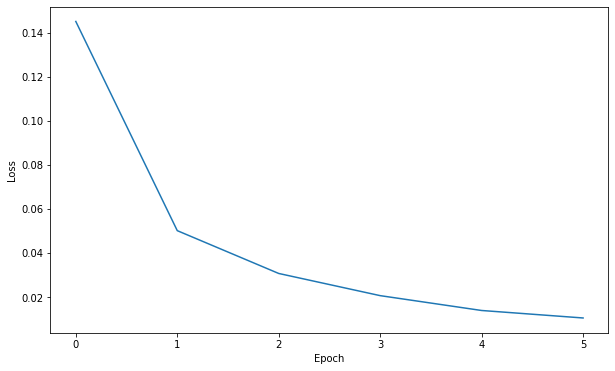

In [70]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch");

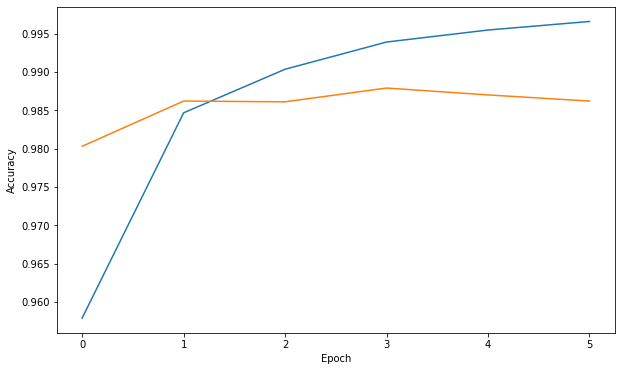

In [33]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch");

In [34]:
print(model.evaluate(X_test,Y_test,verbose=1))  # ilki loss ikincisi accuary

313/313 [==============================] - 2s 6ms/step - loss: 0.0544 - accuracy: 0.9862
[0.054431140422821045, 0.9861999750137329]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
# probabilities of each class
preds = model.predict(X_test)

In [37]:
# The numpy.argmax() function returns indices of the max element of the array 
# in a particular axis.
predictions= np.argmax(preds, axis=1)

In [38]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
print(confusion_matrix(y_test, predictions))

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1131    0    1    0    0    1    0    2    0]
 [   2    1 1015    0    4    0    0    6    4    0]
 [   0    0    2 1001    0    2    0    2    3    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   3    1    0    9    0  868    8    0    3    0]
 [   7    1    1    0    1    0  943    0    5    0]
 [   1    4    5    0    0    0    0 1012    3    3]
 [   4    0    0    1    1    0    1    1  964    2]
 [   1    1    1    2   18    3    0    4    6  973]]


In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.054431140422821045
Test accuracy: 0.9861999750137329


In [42]:
my_number = X_test[0]

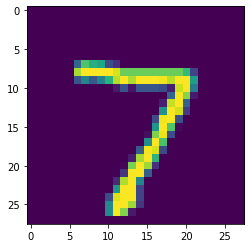

In [43]:
plt.imshow(my_number.reshape(28,28));

In [44]:
# 1 pic, 28x28, black&white
model.predict(my_number.reshape(1,28,28,1))

array([[7.1467121e-10, 4.4673024e-10, 2.9788079e-09, 1.2588846e-08,
        3.8094863e-10, 7.3992487e-12, 7.4492773e-16, 9.9999988e-01,
        4.6659629e-08, 2.8022850e-08]], dtype=float32)

In [45]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7], dtype=int64)

In [46]:
model.save("cnn-1.h5")